In [3]:
import os
import numpy as np
from tqdm import tqdm
#from operator import itemgetter
#from collections import OrderedDict

from PIL import Image
#import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import optim,nn
import torch.nn.functional as F
from torchvision import transforms as T,models
from torch.utils.data import Dataset, DataLoader, random_split
#from torchvision.utils import make_grid

#pd.options.plotting.backend = "plotly"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
class NIH_Dataset(Dataset):

    def __init__(self, data, img_dir, transform=None):
        self.data = data
        self.img_dir = img_dir 
        self.transform = transform 

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_file = self.img_dir + self.data.iloc[:,0][idx]
        img = Image.open(img_file).convert('RGB')
        label = np.array(self.data.iloc[:,1:].iloc[idx])

        if self.transform:
            img = self.transform(img)

        return img,label

In [19]:
data_transform = T.Compose([
    T.RandomRotation((-20,+20)),
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

In [22]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.5 MB 7.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.5 MB 7.8 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.5 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 8.5 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pickle
import pandas as pd
data = pickle.load(open('D:/data_values/data/archive (6)/data.pkl','rb'))

In [24]:
trainds = NIH_Dataset(data,
                      img_dir = 'D:/data_values/data/archive (6)/sample/images/',
                      transform = data_transform)

In [25]:
def deprocess(img):
    img = img.permute(1,2,0)
    img = img * torch.Tensor([0.229, 0.224, 0.225]) + torch.Tensor([0.485, 0.456, 0.406])
    return img

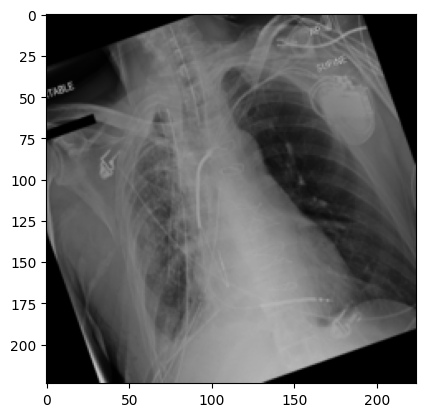

In [26]:
image, label = trainds[0]
class_labels = list(np.where(label==1)[0])
plt.imshow(deprocess(image))


In [82]:
# Cách 4: Chọn ngẫu nhiên một nhãn có giá trị 1
possible_labels = np.where(label == 1)[0]
label_single_random = np.random.choice(possible_labels)

In [84]:
print(possible_labels)
print(label_single_random)

[ 1  5  7 11]
1


In [89]:
X, y = [], []
print(len(trainds))
for i in range(len(trainds)):
    image, label = trainds[i]
    possible_labels = np.where(label == 1)[0]
    if len(possible_labels) == 0:
        continue
    label_single_random = np.random.choice(possible_labels)
    X.append(image)
    y.append(label_single_random)


5606


In [ ]:
import pickle


In [90]:
import pickle

with open('x_y_data.pkl', 'wb') as f:
    pickle.dump((X, y), f)

In [92]:
print(len(X))
print(X[0].shape)
print(y[0])

2562
torch.Size([3, 224, 224])
7


In [100]:
class_counts = np.sum(y, axis=0)
print("Class counts:", class_counts)

Class counts: 17695


In [99]:
from datasets import split_data_train_val_test
X, y = np.array(X), np.array(y)
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, train_size=0.6, valid_size=0.2)

Train: (1537, 3, 224, 224) Validation: (512, 3, 224, 224) Test: (513, 3, 224, 224)


In [101]:
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [94]:
trainset, validset, testset = random_split(trainds, [1500,500,562])

print("Length of trainset : {}".format(len(trainset)))
print("Length of testset : {}".format(len(testset)))
print("Length of validset : {}".format(len(validset)))

ValueError: Sum of input lengths does not equal the length of the input dataset!

In [28]:
trainloader = DataLoader(trainset,
                         batch_size = 32,
                         shuffle = True)

validloader = DataLoader(validset,
                         batch_size = 32,
                         shuffle = False)

testloader = DataLoader(testset,
                        batch_size = 32,
                        shuffle = True)

In [1]:
!pip install pretrainedmodels


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=61016 sha256=b918772e3e487763749684a44c594416c008dbda7ef643aed1bd7217fbe37a7d
  Stored in directory: c:\users\21520\appdata\local\pip\cache\wheels\4c\01\56\40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built pretrainedmodels


In [8]:
ls -a

 Volume in drive D is New Volume
 Volume Serial Number is 623A-C510

 Directory of d:\data_values\pretrained_model



File Not Found


In [ ]:
cd 'D:\data_values\pretrained_model'

In [7]:
cd pretrained_model

d:\data_values\pretrained_model


d:\data_values\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
pip install pretrainedmodels-0.7.4-py3-none-any.whl


Processing .\pretrainedmodels-0.7.4-py3-none-any.whl
  Using cached munch-4.0.0-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached munch-4.0.0-py2.py3-none-any.whl (9.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pretrainedmodels
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


To print the available pretrained settings for a chosen model:


In [12]:
print(pretrainedmodels.pretrained_settings['nasnetalarge'])

{'imagenet': {'url': 'http://data.lip6.fr/cadene/pretrainedmodels/nasnetalarge-a1897284.pth', 'input_space': 'RGB', 'input_size': [3, 331, 331], 'input_range': [0, 1], 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'num_classes': 1000}, 'imagenet+background': {'url': 'http://data.lip6.fr/cadene/pretrainedmodels/nasnetalarge-a1897284.pth', 'input_space': 'RGB', 'input_size': [3, 331, 331], 'input_range': [0, 1], 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'num_classes': 1001}}


In [13]:
print(pretrainedmodels.pretrained_settings['resnet18'])

{'imagenet': {'url': 'https://download.pytorch.org/models/resnet18-5c106cde.pth', 'input_space': 'RGB', 'input_size': [3, 224, 224], 'input_range': [0, 1], 'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225], 'num_classes': 1000}}


In [14]:
model_name = 'resnet18' # could be fbresnet152 or inceptionresnetv2
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

d:\data_values\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\data_values\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\21520/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.80MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
import torch
import pretrainedmodels.utils as utils

load_img = utils.LoadImage()

# transformations depending on the model
# rescale, center crop, normalize, and others (ex: ToBGR, ToRange255)
tf_img = utils.TransformImage(model) 

path_img = 'D:/data_values/data/archive (6)/sample/images/00000013_005.png'

input_img = load_img(path_img)
input_tensor = tf_img(input_img)         # 3x400x225 -> 3x299x299 size may differ
input_tensor = input_tensor.unsqueeze(0) # 3x299x299 -> 1x3x299x299
input = torch.autograd.Variable(input_tensor,
    requires_grad=False)

output_logits = model(input) # 1x1000

In [16]:
print(output_logits.shape)

torch.Size([1, 1000])


In [29]:
# Tạo mô hình cơ sở
model_base = model
#import torch
#from torchvision import models
#from torch import optim,nn
# Tạo mô hình cơ sở
#model_base = models.resnet18()
# Đường dẫn tệp mô hình
model_name = 'D:/data_values/pretrained_model/Pneumonia_model.pt'
model_base.fc = nn.Sequential(
    nn.Linear(512, 14),
    nn.Sigmoid()
)
# Tải trọng số của mô hình
checkpoint = torch.load(model_name)
print(checkpoint.keys())
model = checkpoint['model_state_dict']
#model.load_state_dict(torch.load(model_name))

# Đưa mô hình vào chế độ đánh giá
model_base.load_state_dict(checkpoint['model_state_dict'], strict=False)
model = model_base
print(model.eval())

C:\Users\21520\AppData\Local\Temp\ipykernel_56432\3990824784.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_name)


dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'valid_loss_min'])
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momen

In [ ]:
with torch.no_grad():
    for images,labels in tqdm(validloader):
        images = images.to(device)
        labels = labels.to(device)

        ps = model(images)

In [31]:
import torch.nn as nn
import torch

# Tạo một lớp mới chỉ lấy embedding từ mô hình ResNet
class ResNetEmbedding(nn.Module):
    def __init__(self, original_model):
        super(ResNetEmbedding, self).__init__()
        # Giữ lại toàn bộ ResNet trừ lớp cuối cùng
        self.features = nn.Sequential(*list(original_model.children())[:-2])  # Trừ `avgpool` và `fc`
        self.avgpool = original_model.avgpool  # Giữ lớp avgpool
    
    def forward(self, x):
        # Lấy embedding
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)  # Flatten để đưa thành vector
        return x


In [32]:
embedding_model = ResNetEmbedding(model)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_model = embedding_model.to(device)

# Kiểm tra đầu ra embedding
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Input giả
embedding = embedding_model(dummy_input)
print("Embedding shape:", embedding.shape)  # Kích thước [Batch_size, 512]

Embedding shape: torch.Size([1, 512])


In [102]:
import numpy as np
from tqdm import tqdm

embedding_model.eval()  # Đặt chế độ eval để tránh tính toán gradient

# Danh sách lưu embedding và nhãn
x_embeddings = []
y_labels = []

with torch.no_grad():
    for images, labels in tqdm(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        # Lấy embedding trực tiếp từ mô hình
        features = embedding_model(images)
        
        # Lưu kết quả
        x_embeddings.append(features.cpu().numpy())
        y_labels.append(labels.cpu().numpy())

# Gộp toàn bộ embedding và nhãn
x_embeddings = np.vstack(x_embeddings)
y_labels = np.concatenate(y_labels)

print("Embedding shape:", x_embeddings.shape)
print("Labels shape:", y_labels.shape)

100%|██████████| 49/49 [00:33<00:00,  1.48it/s]

Embedding shape: (1537, 512)
Labels shape: (1537,)


In [103]:
xt_embeddings = []
yt_labels = []

with torch.no_grad():
    for images, labels in tqdm(validloader):
        images = images.to(device)
        labels = labels.to(device)

        # Lấy embedding trực tiếp từ mô hình
        features = embedding_model(images)
        
        # Lưu kết quả
        xt_embeddings.append(features.cpu().numpy())
        yt_labels.append(labels.cpu().numpy())

# Gộp toàn bộ embedding và nhãn
xt_embeddings = np.vstack(xt_embeddings)
yt_labels = np.concatenate(yt_labels)

print("Embedding shape:", xt_embeddings.shape)
print("Labels shape:", yt_labels.shape)

100%|██████████| 16/16 [00:10<00:00,  1.48it/s]

Embedding shape: (512, 512)
Labels shape: (512,)


In [ ]:
xte_embeddings = []
yte_labels = []

with torch.no_grad():
    for images, labels in tqdm(testloader):
        images = images.to(device)
        labels = labels.to(device)

        # Lấy embedding trực tiếp từ mô hình
        features = embedding_model(images)
        
        # Lưu kết quả
        xte_embeddings.append(features.cpu().numpy())
        yte_labels.append(labels.cpu().numpy())

# Gộp toàn bộ embedding và nhãn
xte_embeddings = np.vstack(xte_embeddings)
yte_labels = np.concatenate(yte_labels)

print("Embedding shape:", xte_embeddings.shape)
print("Labels shape:", yte_labels.shape)

100%|██████████| 125/125 [03:17<00:00,  1.58s/it]

Embedding shape: (4000, 512)
Labels shape: (4000, 14)


In [38]:
import numpy as np

In [54]:
ls -a

 Volume in drive D is New Volume
 Volume Serial Number is 623A-C510

 Directory of d:\data_values\pretrained_model



File Not Found


In [57]:
ls -a

 Volume in drive D is New Volume
 Volume Serial Number is 623A-C510

 Directory of D:\data_values



File Not Found


In [56]:
import os

os.chdir('D:/data_values')

In [73]:
from machine_learning_model import LogisticRegression
from nosify import mix_label

In [104]:
print(yt_labels.shape, y_labels.shape)

(512,) (1537,)


In [105]:
print(yt_labels[3])

0


In [107]:
# Assuming mix_label function is already imported from nosify

# Create noisy labels for training set
param = mix_label(y_labels, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)


Noisy training labels shape: (1537,)


In [108]:
import pickle

with open('x_y_embedding_data.pkl', 'wb') as f:
    pickle.dump((x_embeddings, y_labels, xt_embeddings, yt_labels), f)

In [1]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_data.pkl', 'rb') as f:
    x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)

print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (1537, 512)
Training labels shape: (1537,)
Validation embeddings shape: (512, 512)
Validation labels shape: (512,)


In [4]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
param = mix_label(y_labels, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

512
Noisy training labels shape: (1537,)
Epoch [10/1000], Loss: 2.5342
Epoch [20/1000], Loss: 2.5144
Epoch [30/1000], Loss: 2.5342
Epoch [40/1000], Loss: 2.5342
Epoch [50/1000], Loss: 2.5144
Epoch [60/1000], Loss: 2.5342
Epoch [70/1000], Loss: 2.5341
Epoch [80/1000], Loss: 2.5337
Epoch [90/1000], Loss: 2.6362
Epoch [100/1000], Loss: 2.6362
Epoch [110/1000], Loss: 2.6362
Epoch [120/1000], Loss: 2.6164
Epoch [130/1000], Loss: 2.6362
Epoch [140/1000], Loss: 2.6362
Epoch [150/1000], Loss: 2.6362
Epoch [160/1000], Loss: 2.6362
Epoch [170/1000], Loss: 2.6362
Epoch [180/1000], Loss: 2.6164
Epoch [190/1000], Loss: 2.6164
Epoch [200/1000], Loss: 2.6362
Epoch [210/1000], Loss: 2.6362
Epoch [220/1000], Loss: 2.6164
Epoch [230/1000], Loss: 2.6362
Epoch [240/1000], Loss: 2.6164
Epoch [250/1000], Loss: 2.6362
Epoch [260/1000], Loss: 2.6362
Epoch [270/1000], Loss: 2.6362
Epoch [280/1000], Loss: 2.6164
Epoch [290/1000], Loss: 2.6362
Epoch [300/1000], Loss: 2.6362
Epoch [310/1000], Loss: 2.6362
Epoch [

In [5]:
# Bật autoreload
%load_ext autoreload
%autoreload 2

In [19]:
from data_valuate import KNNEvaluator
knn_evaluator = KNNEvaluator()
data_values = knn_evaluator.evaluate_data_values(x_embeddings, y_labels, xt_embeddings, yt_labels)

100%|██████████| 1536/1536 [00:00<00:00, 3661.92it/s]


In [20]:
print(data_values)

[-4.22400190e-04 -3.48205213e-04 -1.17353084e-04 ...  1.07103755e-04
 -8.37625776e-05 -1.57448711e-04]


In [21]:
from experiment_method import discover_corrupted_sample
corrupted_results = discover_corrupted_sample(data_values, noisy_train_indices)
print("Corrupted Sample Discovery Result:", corrupted_results)

Corrupted Sample Discovery Result: {'found_rates': [0.0, 0.09446254071661238, 0.16938110749185667, 0.2703583061889251, 0.34201954397394135, 0.43973941368078173, 0.50814332247557, 0.5700325732899023, 0.6677524429967426, 0.745928338762215, 0.8045602605863192, 0.8469055374592834, 0.8664495114006515, 0.8957654723127035, 0.9250814332247557, 0.9413680781758957, 0.9609120521172638, 0.9609120521172638, 0.9706840390879479, 0.9869706840390879, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


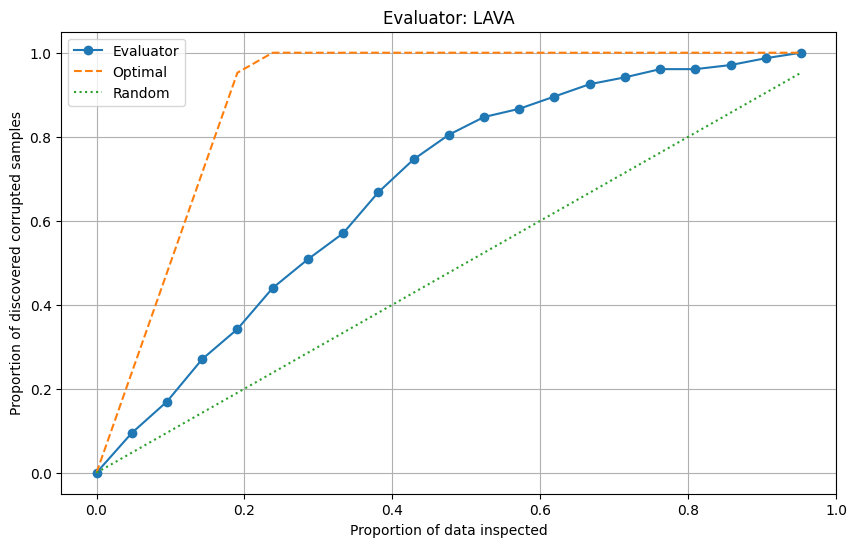

In [22]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

In [28]:
# lava geomloss
from data_valuate import LavaEvaluator
lava_evaluator = LavaEvaluator()
data_values = lava_evaluator.evaluate_data_values(x_embeddings, y_labels, xt_embeddings, yt_labels, 1, 10)
print(data_values)

[-9.150731  -7.0305963 -9.515322  ... -6.536691  -8.511421  -8.219938 ]


In [29]:
print(data_values.sum())

-14258.088


In [30]:
from experiment_method import discover_corrupted_sample
corrupted_results = discover_corrupted_sample(data_values, noisy_train_indices)
print("Corrupted Sample Discovery Result:", corrupted_results)

Corrupted Sample Discovery Result: {'found_rates': [0.0, 0.03908794788273615, 0.08794788273615635, 0.1498371335504886, 0.20195439739413681, 0.24104234527687296, 0.30944625407166126, 0.36482084690553745, 0.4201954397394137, 0.4560260586319218, 0.498371335504886, 0.5472312703583062, 0.6026058631921825, 0.6547231270358306, 0.7003257328990228, 0.749185667752443, 0.8078175895765473, 0.8729641693811075, 0.9120521172638436, 0.9576547231270358, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


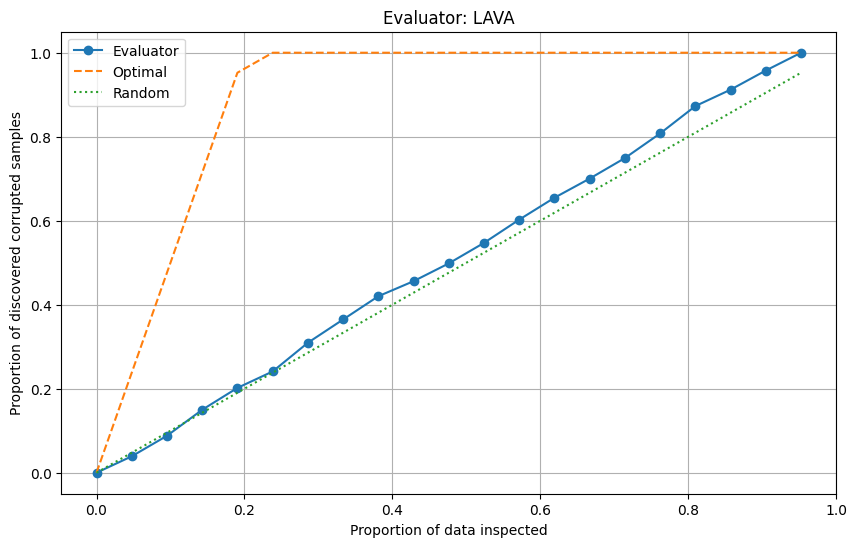

In [31]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

In [106]:
# lava POT
from data_valuate import LavaEvaluator
lava_evaluator = LavaEvaluator()
data_values = lava_evaluator.evaluate_data_values(x_embeddings, y_labels, xt_embeddings, yt_labels, 1, 100)
print(data_values)

C1 la: tensor([[[174.6986, 135.5794, 153.5677,  ..., 165.1717, 168.5000, 173.0125],
         [135.0136, 166.2271, 166.9221,  ..., 149.6041, 150.5488, 175.1716],
         [164.1536, 186.6732, 218.5007,  ..., 163.8168, 200.8517, 214.0574],
         ...,
         [180.7883, 172.4642, 215.5874,  ..., 211.4451, 149.9139, 172.4003],
         [183.7001, 165.3426, 218.2639,  ..., 202.1906, 165.8228, 179.1692],
         [171.2253, 183.3634, 210.9674,  ..., 161.2897, 159.6514, 184.5670]]])
C2 la: tensor([[[130.5340, 128.8279, 131.4365,  ..., 131.5479, 127.3551, 130.5340],
         [124.7426, 126.8177,   0.0000,  ..., 130.1101, 125.5616, 124.7426],
         [130.5340, 128.8279, 131.4365,  ..., 131.5479, 127.3551, 130.5340],
         ...,
         [121.0200, 121.3841, 122.8389,  ..., 126.8555, 123.4639, 121.0200],
         [134.3114, 133.2926, 134.2550,  ..., 138.1549, 134.0677, 134.3114],
         [121.0200, 121.3841, 122.8389,  ..., 126.8555, 123.4639, 121.0200]]])
C1 la: tensor([[[174.6986, 135

In [95]:
unique_values = torch.unique(torch.tensor(y_labels))
print(unique_values)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])


In [100]:
print(data_values.sum())

-103466.91


In [107]:
from experiment_method import discover_corrupted_sample
corrupted_results = discover_corrupted_sample(data_values, noisy_train_indices)
print("Corrupted Sample Discovery Result:", corrupted_results)

Corrupted Sample Discovery Result: {'found_rates': [0.0, 0.11074918566775244, 0.1498371335504886, 0.19543973941368079, 0.26058631921824105, 0.2996742671009772, 0.3778501628664495, 0.4495114006514658, 0.50814332247557, 0.5635179153094463, 0.6221498371335505, 0.7231270358306189, 0.7980456026058632, 0.8599348534201955, 0.8827361563517915, 0.9087947882736156, 0.9283387622149837, 0.9348534201954397, 0.9478827361563518, 0.9771986970684039, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


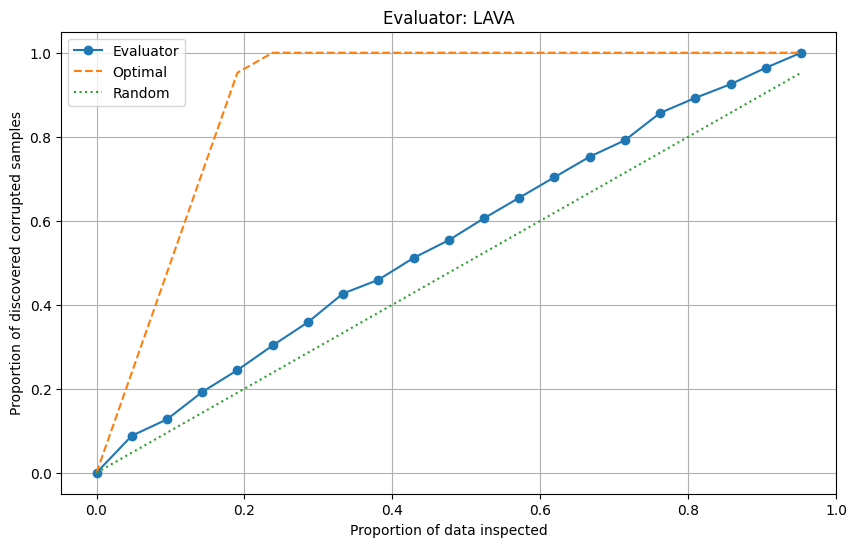

In [105]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

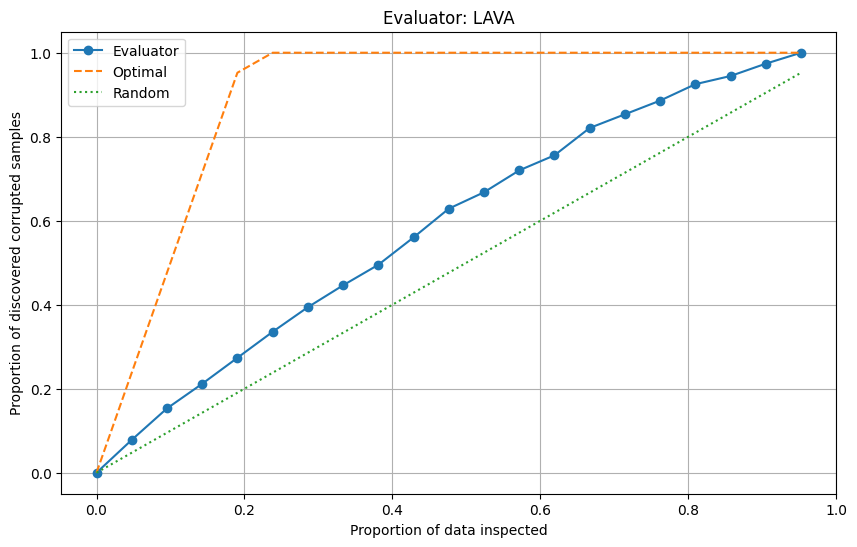

In [102]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

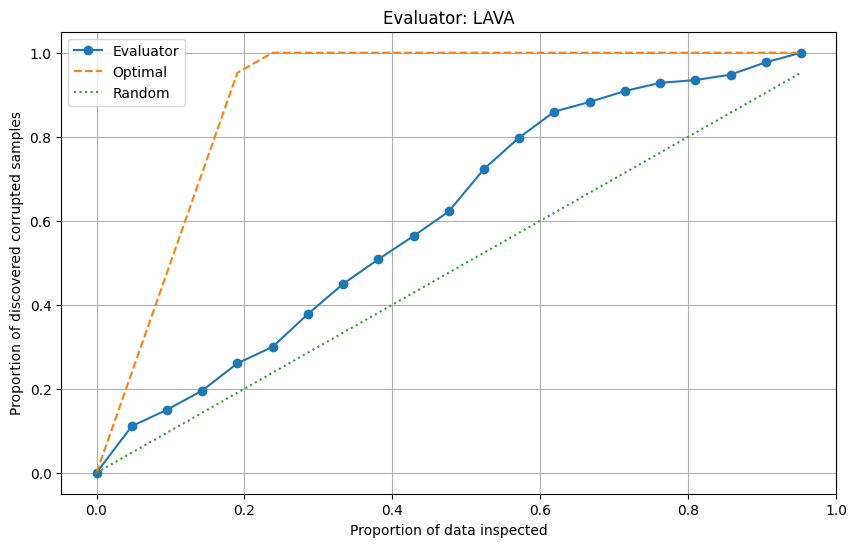

In [108]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

In [123]:
# lava POT
from data_valuate import LavaEvaluator
lava_evaluator = LavaEvaluator()
data_values = lava_evaluator.evaluate_data_values(x_embeddings, y_labels, xt_embeddings, yt_labels, 1, 1)
print(data_values)

C1 la: tensor([[174.6986, 135.5794, 153.5678,  ..., 165.1717, 168.5001, 173.0125],
        [135.0136, 166.2271, 166.9222,  ..., 149.6041, 150.5489, 175.1717],
        [164.1536, 186.6733, 218.5007,  ..., 163.8168, 200.8518, 214.0574],
        ...,
        [180.7883, 172.4641, 215.5874,  ..., 211.4450, 149.9139, 172.4003],
        [183.7002, 165.3427, 218.2640,  ..., 202.1906, 165.8228, 179.1693],
        [171.2253, 183.3634, 210.9674,  ..., 161.2897, 159.6514, 184.5670]])
C2 la: tensor([[0.2817, 0.2879, 0.3593,  ..., 0.3066, 0.3313, 0.2817],
        [0.3169, 0.3156, 0.0000,  ..., 0.3451, 0.3564, 0.3169],
        [0.2817, 0.2879, 0.3593,  ..., 0.3066, 0.3313, 0.2817],
        ...,
        [0.2570, 0.2653, 0.2795,  ..., 0.3120, 0.2765, 0.2570],
        [0.2869, 0.3151, 0.3594,  ..., 0.3534, 0.3307, 0.2869],
        [0.2570, 0.2653, 0.2795,  ..., 0.3120, 0.2765, 0.2570]])
C1 la: tensor([[0.3225, 0.2195, 0.2669,  ..., 0.2975, 0.3062, 0.3181],
        [0.2181, 0.3002, 0.3021,  ..., 0.2565, 

In [124]:
from experiment_method import discover_corrupted_sample
corrupted_results = discover_corrupted_sample(data_values, noisy_train_indices)
print("Corrupted Sample Discovery Result:", corrupted_results)

Corrupted Sample Discovery Result: {'found_rates': [0.0, 0.0749185667752443, 0.1563517915309446, 0.23127035830618892, 0.2931596091205212, 0.3485342019543974, 0.4234527687296417, 0.49185667752442996, 0.5537459283387622, 0.6286644951140065, 0.6710097719869706, 0.752442996742671, 0.8110749185667753, 0.8566775244299675, 0.8859934853420195, 0.9120521172638436, 0.9381107491856677, 0.9511400651465798, 0.9739413680781759, 0.9869706840390879, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


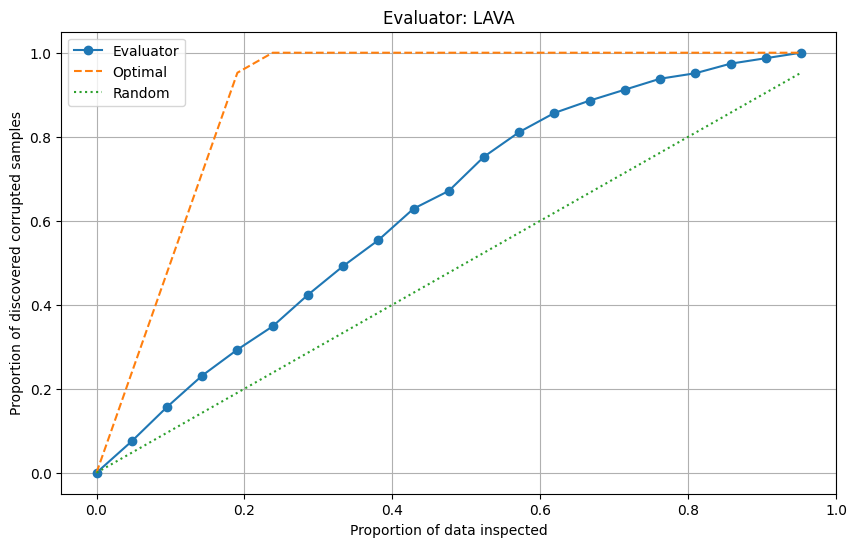

In [125]:
from visualize import plot_corrupted_sample_discovery
plot_corrupted_sample_discovery(corrupted_results)

In [2]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_data.pkl', 'rb') as f:
    x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)

print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (1537, 512)
Training labels shape: (1537,)
Validation embeddings shape: (512, 512)
Validation labels shape: (512,)


In [3]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
param = mix_label(y_labels, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

512
Noisy training labels shape: (1537,)
Epoch [10/1000], Loss: 2.5323
Epoch [20/1000], Loss: 2.5125
Epoch [30/1000], Loss: 2.5125
Epoch [40/1000], Loss: 2.5125
Epoch [50/1000], Loss: 2.5125
Epoch [60/1000], Loss: 2.5323
Epoch [70/1000], Loss: 2.5322
Epoch [80/1000], Loss: 2.5125
Epoch [90/1000], Loss: 2.5322
Epoch [100/1000], Loss: 2.5322
Epoch [110/1000], Loss: 2.5322
Epoch [120/1000], Loss: 2.5322
Epoch [130/1000], Loss: 2.5322
Epoch [140/1000], Loss: 2.5124
Epoch [150/1000], Loss: 2.5207
Epoch [160/1000], Loss: 2.5322
Epoch [170/1000], Loss: 2.5322
Epoch [180/1000], Loss: 2.5322
Epoch [190/1000], Loss: 2.5322
Epoch [200/1000], Loss: 2.5125
Epoch [210/1000], Loss: 2.5322
Epoch [220/1000], Loss: 2.5322
Epoch [230/1000], Loss: 2.5125
Epoch [240/1000], Loss: 2.5322
Epoch [250/1000], Loss: 2.5125
Epoch [260/1000], Loss: 2.5322
Epoch [270/1000], Loss: 2.5322
Epoch [280/1000], Loss: 2.5125
Epoch [290/1000], Loss: 2.5125
Epoch [300/1000], Loss: 2.5322
Epoch [310/1000], Loss: 2.5322
Epoch [

Running evaluator: KNNEvaluator


100%|██████████| 1536/1536 [00:00<00:00, 3549.53it/s]


Running evaluator: LavaEvaluator


C1 la: tensor([[174.6986, 135.5794, 153.5678,  ..., 165.1717, 168.5001, 173.0125],
        [135.0136, 166.2271, 166.9222,  ..., 149.6041, 150.5489, 175.1717],
        [164.1536, 186.6733, 218.5007,  ..., 163.8168, 200.8518, 214.0574],
        ...,
        [180.7883, 172.4641, 215.5874,  ..., 211.4450, 149.9139, 172.4003],
        [183.7002, 165.3427, 218.2640,  ..., 202.1906, 165.8228, 179.1693],
        [171.2253, 183.3634, 210.9674,  ..., 161.2897, 159.6514, 184.5670]])
C2 la: tensor([[0.2977, 0.3346, 0.3696,  ..., 0.2977, 0.2840, 0.2977],
        [0.2591, 0.2812, 0.2855,  ..., 0.2849, 0.2787, 0.2591],
        [0.3400, 0.3386, 0.3705,  ..., 0.3074, 0.3512, 0.3400],
        ...,
        [0.2591, 0.2812, 0.2855,  ..., 0.2849, 0.2787, 0.2591],
        [0.2869, 0.3138, 0.3410,  ..., 0.2873, 0.3280, 0.2869],
        [0.2591, 0.2812, 0.2855,  ..., 0.2849, 0.2787, 0.2591]])
C1 la: tensor([[0.3225, 0.2195, 0.2669,  ..., 0.2975, 0.3062, 0.3181],
        [0.2181, 0.3002, 0.3021,  ..., 0.2565, 

d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


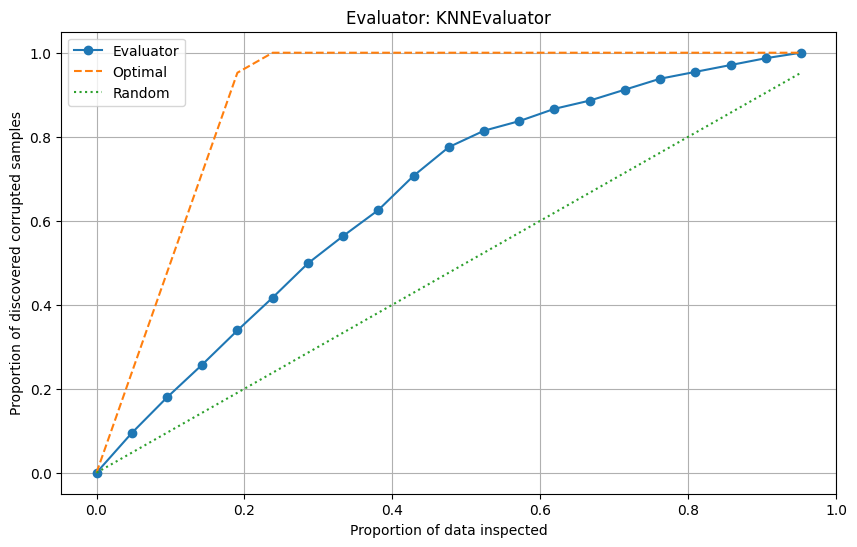

LavaEvaluator: {'found_rates': [0.0, 0.0749185667752443, 0.15960912052117263, 0.23452768729641693, 0.2899022801302932, 0.3550488599348534, 0.4234527687296417, 0.48534201954397393, 0.5504885993485342, 0.6123778501628665, 0.6547231270358306, 0.7198697068403909, 0.758957654723127, 0.8045602605863192, 0.8534201954397395, 0.8892508143322475, 0.9185667752442996, 0.9381107491856677, 0.9706840390879479, 0.9837133550488599, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


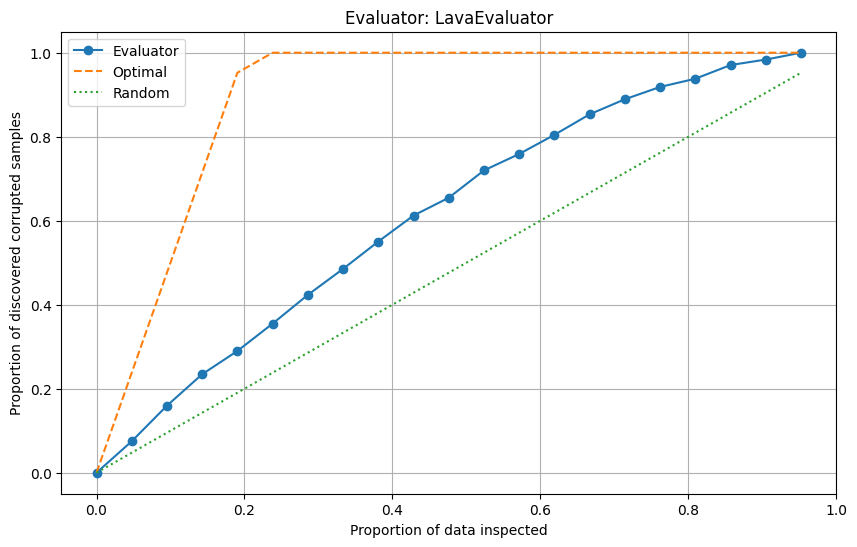

{'KNNEvaluator': {'found_rates': [0.0,
   0.09446254071661238,
   0.1791530944625407,
   0.25732899022801303,
   0.33876221498371334,
   0.4169381107491857,
   0.498371335504886,
   0.5635179153094463,
   0.6254071661237784,
   0.7068403908794788,
   0.7752442996742671,
   0.8143322475570033,
   0.8371335504885994,
   0.8664495114006515,
   0.8859934853420195,
   0.9120521172638436,
   0.9381107491856677,
   0.9543973941368078,
   0.9706840390879479,
   0.9869706840390879,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_

In [4]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

# date 2

Running evaluator: KNNEvaluator


100%|██████████| 1536/1536 [00:00<00:00, 3580.66it/s]


Running evaluator: LavaEvaluator


C1 la: tensor([[174.6986, 135.5794, 153.5678,  ..., 165.1717, 168.5001, 173.0125],
        [135.0136, 166.2271, 166.9222,  ..., 149.6041, 150.5489, 175.1717],
        [164.1536, 186.6733, 218.5007,  ..., 163.8168, 200.8518, 214.0574],
        ...,
        [180.7883, 172.4641, 215.5874,  ..., 211.4450, 149.9139, 172.4003],
        [183.7002, 165.3427, 218.2640,  ..., 202.1906, 165.8228, 179.1693],
        [171.2253, 183.3634, 210.9674,  ..., 161.2897, 159.6514, 184.5670]])
C2 la: tensor([[0.2797, 0.3319, 0.3649,  ..., 0.2788, 0.2869, 0.2797],
        [0.3390, 0.3147, 0.3610,  ..., 0.3005, 0.3275, 0.3390],
        [0.3126, 0.3120, 0.3582,  ..., 0.2945, 0.3045, 0.3126],
        ...,
        [0.2575, 0.2644, 0.2889,  ..., 0.0000, 0.2812, 0.2575],
        [0.2886, 0.3159, 0.3565,  ..., 0.2720, 0.3295, 0.2886],
        [0.2575, 0.2644, 0.2889,  ..., 0.0000, 0.2812, 0.2575]])
C1 la: tensor([[0.3225, 0.2195, 0.2669,  ..., 0.2975, 0.3062, 0.3181],
        [0.2181, 0.3002, 0.3021,  ..., 0.2565, 

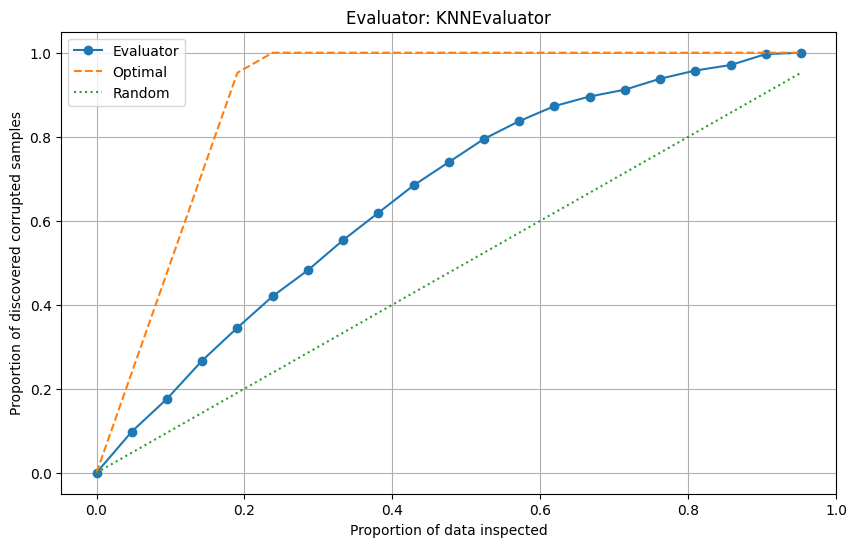

LavaEvaluator: {'found_rates': [0.0, 0.08143322475570032, 0.15960912052117263, 0.2280130293159609, 0.28664495114006516, 0.36156351791530944, 0.42671009771986973, 0.498371335504886, 0.5667752442996743, 0.6319218241042345, 0.6905537459283387, 0.755700325732899, 0.8175895765472313, 0.8534201954397395, 0.8957654723127035, 0.9250814332247557, 0.9348534201954397, 0.9543973941368078, 0.9771986970684039, 0.9837133550488599, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


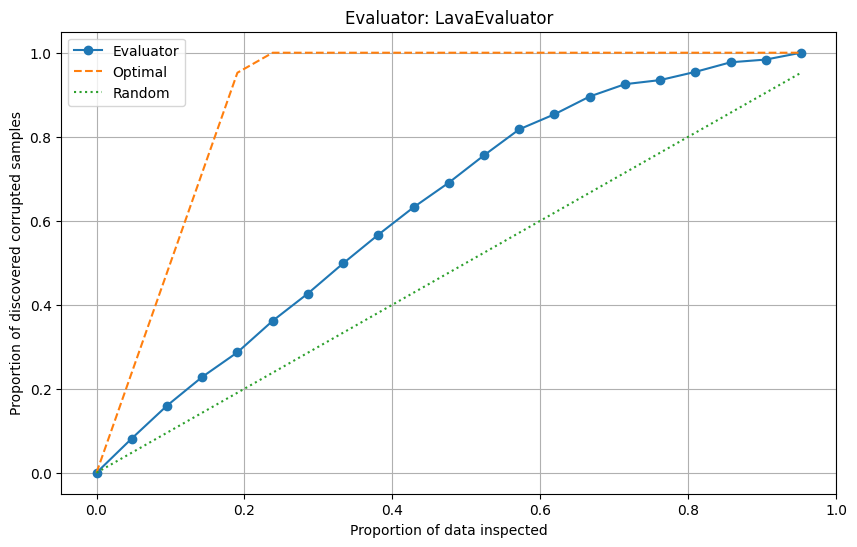

{'KNNEvaluator': {'found_rates': [0.0,
   0.09771986970684039,
   0.1758957654723127,
   0.2671009771986971,
   0.34527687296416937,
   0.4201954397394137,
   0.4820846905537459,
   0.5537459283387622,
   0.6188925081433225,
   0.6840390879478827,
   0.739413680781759,
   0.7947882736156352,
   0.8371335504885994,
   0.8729641693811075,
   0.8957654723127035,
   0.9120521172638436,
   0.9381107491856677,
   0.9576547231270358,
   0.9706840390879479,
   0.996742671009772,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_ra

In [6]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [ ]:
from base_evaluator import BaseEvaluator, BetaEvaluator, ExperimentRunner, TMCEvaluator
from machine_learning_model import ClassifierMLP
num_train = 100
num_valid = 20
feature_dim = 10

x_train = torch.randn(num_train, feature_dim)
y_train = torch.randint(0, 2, (num_train,))
x_valid = torch.randn(num_valid, feature_dim)
y_valid = torch.randint(0, 2, (num_valid,))
# Step 2: Initialize Evaluator
model = ClassifierMLP(input_dim=feature_dim, num_classes=2)
beta_evaluator = BetaEvaluator(model=model, alpha=4, beta=1, mc_epochs=500, min_cardinality=5, random_state=42)
css_evaluator = TMCEvaluator(model, mc_epochs=500, min_cardinality=5, random_state=42)
# Step 3: Run Experiment
experiment = ExperimentRunner(evaluators=[beta_evaluator, css_evaluator])
results = experiment.run(x_train, y_train, x_valid, y_valid)

# Step 4: Output Results
print("Results:", results)
print("Timings:", experiment.timings)

# Step 5: Save Results
experiment.save_results()

NameError: name 's' is not defined

BetaEvaluator: {'found_rates': [0.0, 0.0, 0.003257328990228013, 0.009771986970684038, 0.019543973941368076, 0.026058631921824105, 0.029315960912052116, 0.03257328990228013, 0.04234527687296417, 0.04560260586319218, 0.04560260586319218, 0.048859934853420196, 0.05211726384364821, 0.05211726384364821, 0.05537459283387622, 0.05863192182410423, 0.05863192182410423, 0.06188925081433225, 0.06514657980456026, 0.07166123778501629, 0.0749185667752443], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


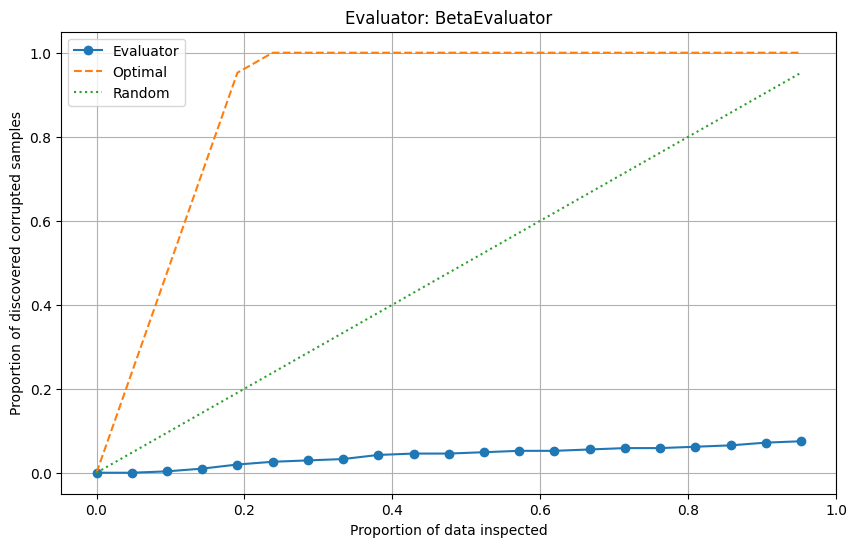

TMCEvaluator: {'found_rates': [0.0, 0.006514657980456026, 0.013029315960912053, 0.013029315960912053, 0.013029315960912053, 0.02280130293159609, 0.02280130293159609, 0.02280130293159609, 0.029315960912052116, 0.03257328990228013, 0.03908794788273615, 0.03908794788273615, 0.03908794788273615, 0.03908794788273615, 0.048859934853420196, 0.05211726384364821, 0.05863192182410423, 0.06188925081433225, 0.06840390879478828, 0.0749185667752443, 0.0749185667752443], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


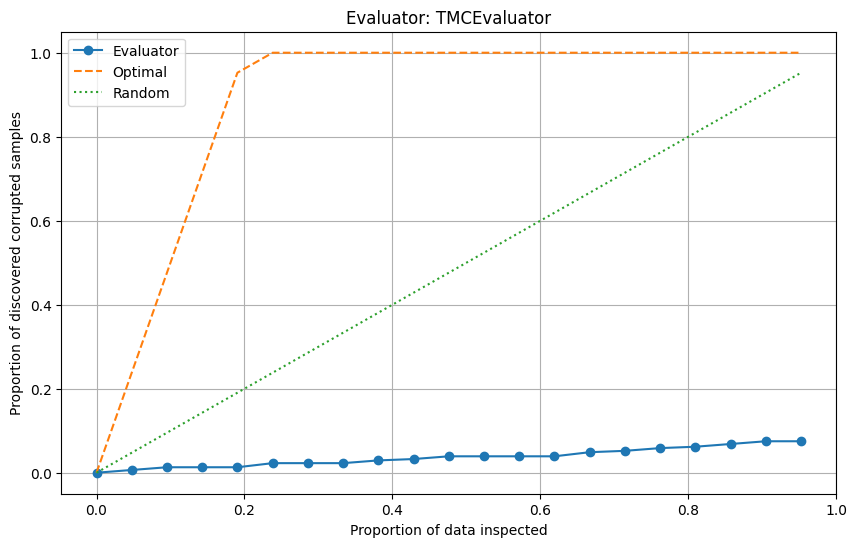

Results: {'BetaEvaluator': 109.10513997077942, 'TMCEvaluator': 109.83836007118225}


In [10]:
experiment.evaluate(noisy_train_indices)
print("Results:", experiment.timings)